02/07/25 
Yifu Chen 
research project

#DAY 2
try example 1 from paper 
try get similar plot


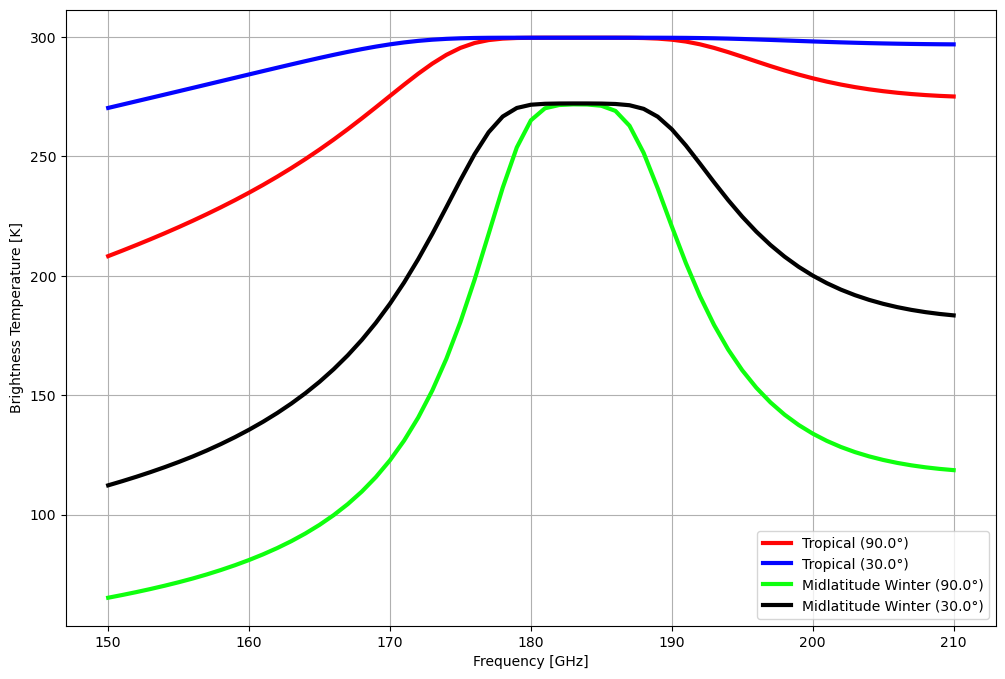

In [2]:
"""
Paper Example 1 
"""

import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

colors = ['#ff0405', '#0404ff', '#0fff0e', '#000000']

atms = [atmp.TROPICAL, atmp.MIDLATITUDE_WINTER]

cnt = 0

for atm in atms:
    z, p, _, t, md = atmp.gl_atm(atm)
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    rh = mr2rh(p, t, gkg)[0] / 100
    frq = np.arange(150, 211, 1)
    ang = np.array([90., 30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rh, frq, np.array([a]))

        rte.init_absmdl('R16')
        #change from R195D to R16
        #BC: a warn: "Use the more recent model by Rosenkranz, 2015, from R16 model onwards"

        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)', lw=3, legend=True,
                        color=colors[cnt], grid=True)
        cnt += 1

plt.show()


#Done the example:

rte.init_absmdl('R195D') R195D model is out of date
So change to rte.init_absmdl('R16') base on the error output



#Next step is try to know PWV for those profiles and see can I change the PWV?

assume md (numpy.ndarray): Molecular densities (ppmv) is PWV (Precipitable water vapor)? since we have md[:, atmp.H2O]?
so we can override this variable to see the effect of PWV on the result

can find the file give Latitude
use MIDLATITUDE for ABQ

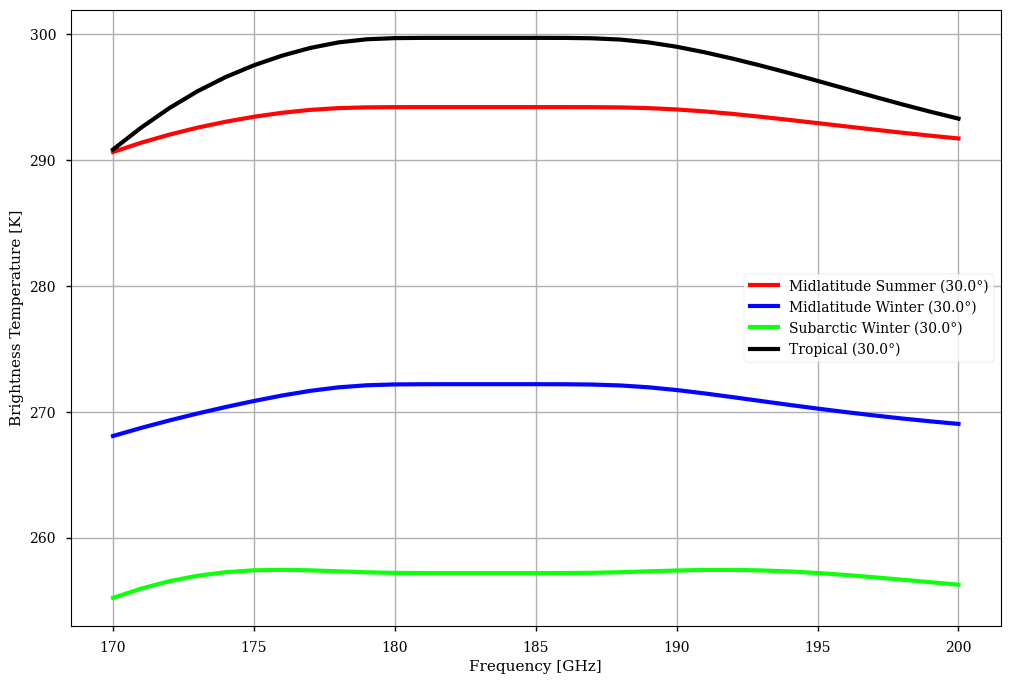

In [20]:
"""
Paper Example 1 
"""

import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

colors = ['#ff0405', '#0404ff', '#0fff0e', '#000000']

atms = [atmp.MIDLATITUDE_SUMMER, atmp.MIDLATITUDE_WINTER, atmp.SUBARCTIC_WINTER, atmp.TROPICAL]

cnt = 0

for atm in atms:
    z, p, _, t, md = atmp.gl_atm(atm)
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    #print(gkg)
    random_numbers = np.random.uniform(0, 10, 50)
    #print(random_numbers)
    #break
    gkg = random_numbers
    rh = mr2rh(p, t, gkg)[0] / 100
    frq = np.arange(170, 201, 1)
    ang = np.array([30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rh, frq, np.array([a]))

        rte.init_absmdl('R16')
        #change from R195D to R16
        #BC: a warn: "Use the more recent model by Rosenkranz, 2015, from R16 model onwards"

        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)', lw=3, legend=True,
                        color=colors[cnt], grid=True)
        cnt += 1

plt.show()


In [1]:
"""
Paper Example 1 
"""

import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

colors = ['#ff0405', '#0404ff', '#0fff0e', '#000000']

atms = [atmp.MIDLATITUDE_WINTER, atmp.SUBARCTIC_WINTER, atmp.TROPICAL]

cnt = 0

#same_number = [0.3, 0.6, 1, 3]

for atm in atms:
    z, p, _, t, md = atmp.gl_atm(atm)
    #!!!need be here do the PWV overwrite!!!
    gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
    print(gkg)
    same_number_array = np.full(50, 1)
    print(same_number_array[0])
    #break
    gkg = random_numbers
    rh = mr2rh(p, t, gkg)[0] / 100
    frq = np.arange(170, 191, 1)
    ang = np.array([30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rh, frq, np.array([a]))

        rte.init_absmdl('R16')
        #change from R195D to R16
        #BC: a warn: "Use the more recent model by Rosenkranz, 2015, from R16 model onwards"

        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)', lw=3, legend=True,
                        color=colors[cnt], grid=True)
        cnt += 1

plt.show()


[2.68442504e+00 2.14828640e+00 1.73405399e+00 1.29867458e+00
 7.96122349e-01 5.12565959e-01 3.17391590e-01 1.44359373e-01
 6.69862320e-02 3.46188828e-02 1.84103293e-02 6.21970585e-03
 3.73182351e-03 3.10985292e-03 2.98545881e-03 2.92326175e-03
 2.86106469e-03 2.79886763e-03 2.79886763e-03 2.79886763e-03
 2.79886763e-03 2.79886763e-03 2.81752675e-03 2.82996616e-03
 2.86106469e-03 2.89216322e-03 2.92326175e-03 2.95436028e-03
 2.98545881e-03 3.01655734e-03 3.04765587e-03 3.07875440e-03
 3.10985292e-03 3.10985292e-03 3.10985292e-03 3.07875440e-03
 3.01655734e-03 2.79886763e-03 2.48788234e-03 2.05250293e-03
 1.67932058e-03 1.24394117e-03 8.27220878e-04 5.28674997e-04
 3.35864116e-04 2.48788234e-04 2.11469999e-04 1.74151764e-04
 1.49272940e-04 1.24394117e-04]
1


NameError: name 'random_numbers' is not defined

may want more specific value for PWV?

didn't got different md(gkg) for same profiles